Dataset Shape: (2000, 26)


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199
1999,1073,convex,scaly,yellow,yes,pungent,descending,close,narrow,purple,...,partial,white,two,large,white,numerous,urban,poisonous,13.066414,21.056642



Missing Values, if any:
 Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


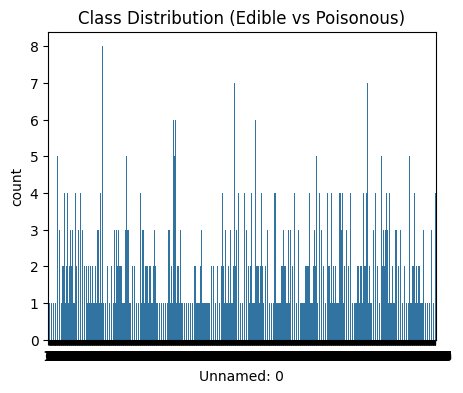

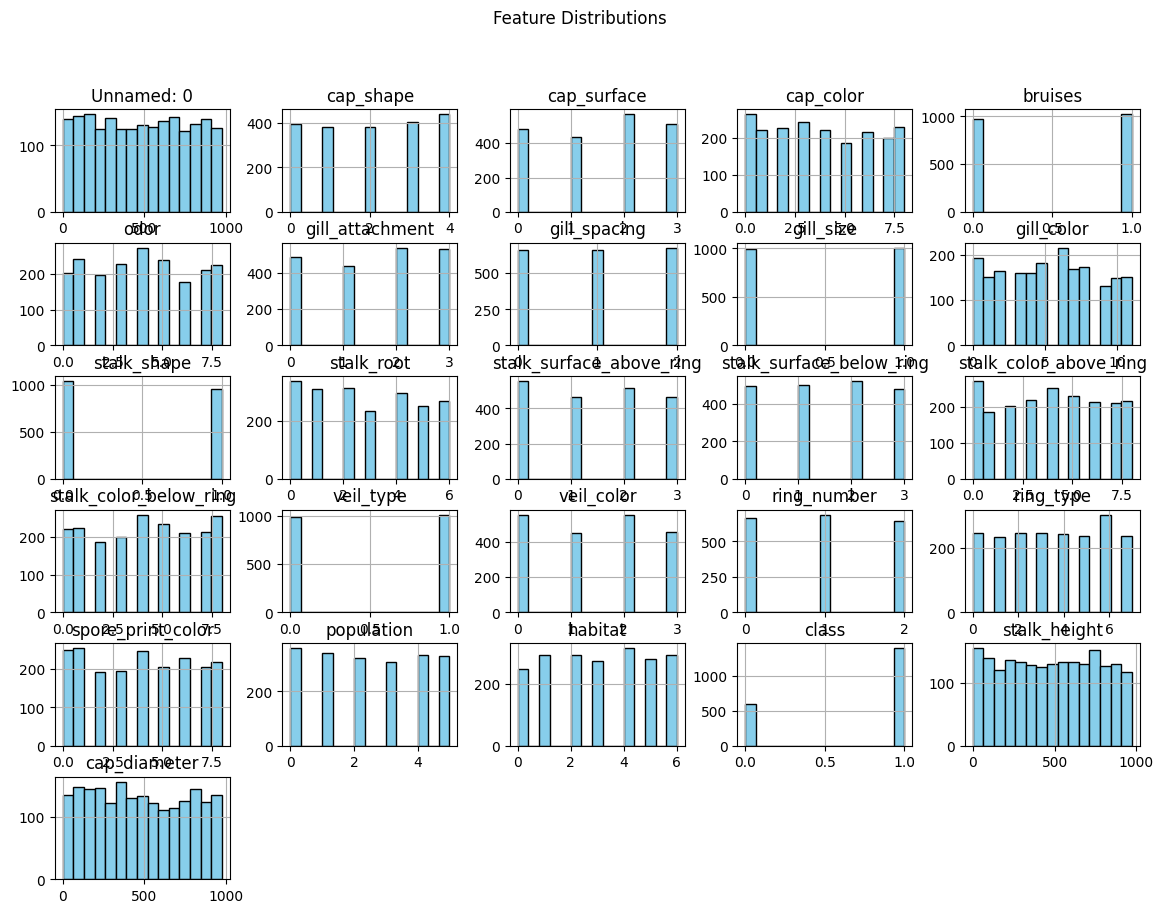

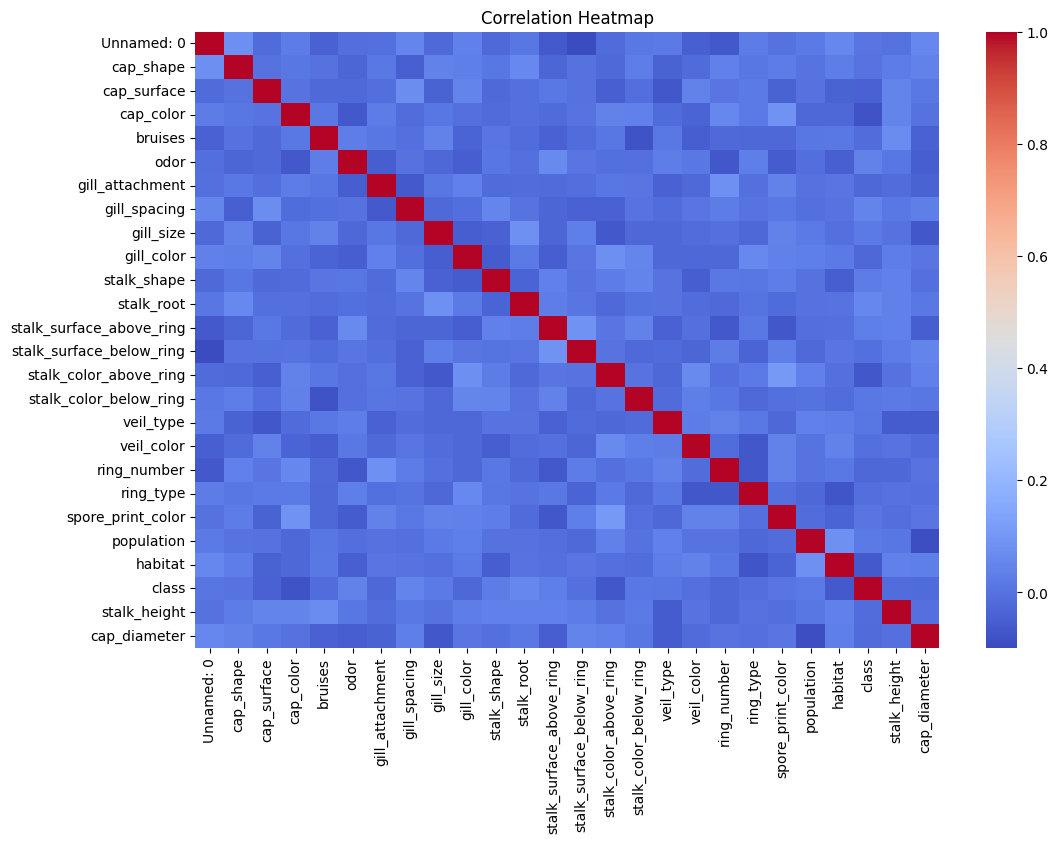

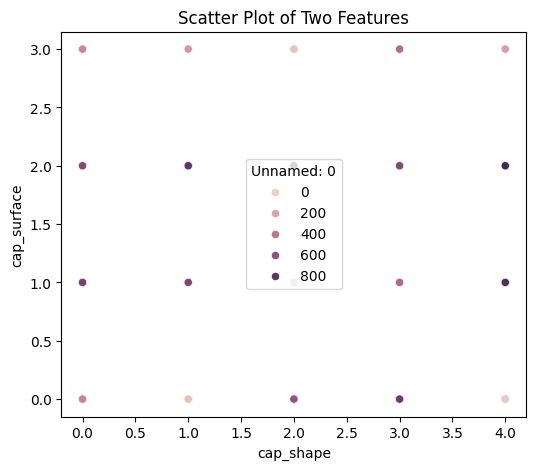


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Accuracy: 0.858

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.55      0.70       150
           1       0.84      0.99      0.91       350

    accuracy                           0.86       500
   macro avg       0.90      0.77      0.80       500
weighted avg       0.87      0.86      0.84       500



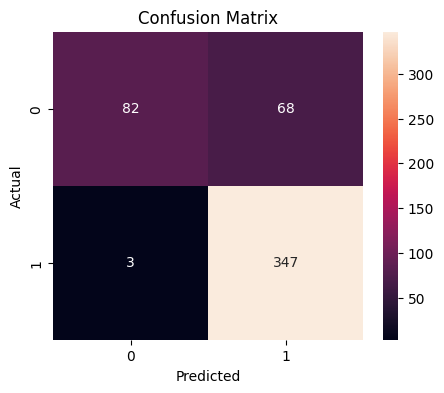

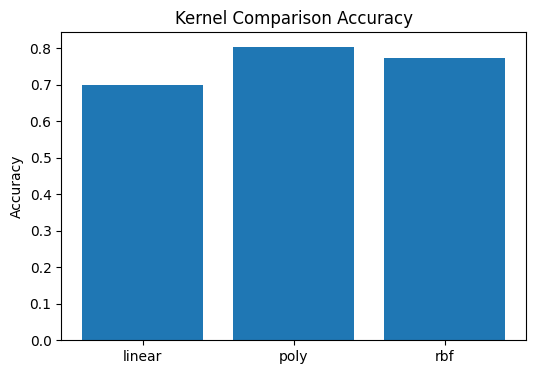

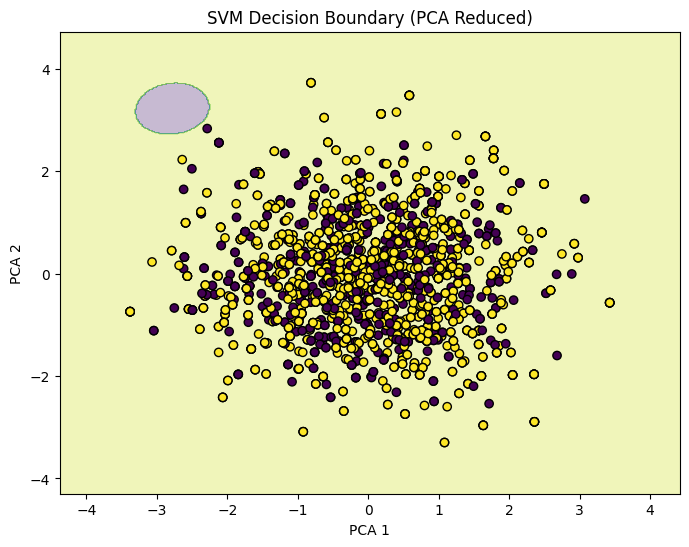

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# ------------------------------------------------------------
# 1. Loading the Dataset
# ------------------------------------------------------------
df = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/SVM/SVM/mushroom.csv")

print("Dataset Shape:", df.shape)
display(df.head())
display(df.tail())

# ------------------------------------------------------------
# 2. Missing Values Check!
# ------------------------------------------------------------
print("\nMissing Values, if any:\n", df.isnull().sum())

# ------------------------------------------------------------
# 3. Target Class Visualization
# ------------------------------------------------------------
plt.figure(figsize=(5,4))
sns.countplot(x=df.iloc[:,0]) # First column is target
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

# ------------------------------------------------------------
# 4. Encoding Categorical Variables
# ------------------------------------------------------------
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# ------------------------------------------------------------
# 5. EDA – Histograms
# ------------------------------------------------------------
df.hist(figsize=(14,10), bins=15, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

# ------------------------------------------------------------
# 6. Correlation Heatmap
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------------------------------------
# 7. Scatter Visualization (first two important features)
# ------------------------------------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=df.iloc[:,1], y=df.iloc[:,2], hue=df.iloc[:,0])
plt.title("Scatter Plot of Two Features")
plt.show()

# ------------------------------------------------------------
# 8. Feature / Target Split
# ------------------------------------------------------------
X = df.drop(['Unnamed: 0', 'class'], axis=1)
y = df['class']

# ------------------------------------------------------------
# 9. Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------
# 10. Train-Test Split (80–20)
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# ------------------------------------------------------------
# 11. GridSearch Hyperparameter Tuning (Kernel + C + Gamma)
# ------------------------------------------------------------
param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.1, 0.01]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)

svm = grid.best_estimator_

# ------------------------------------------------------------
# 12. Model Evaluation
# ------------------------------------------------------------
y_pred = svm.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------------------------------------------------
# 13. Kernel Comparison
# ------------------------------------------------------------
kernels = ["linear","poly","rbf"]
scores = []

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.figure(figsize=(6,4))
plt.bar(kernels, scores)
plt.title("Kernel Comparison Accuracy")
plt.ylabel("Accuracy")
plt.show()

# ------------------------------------------------------------
# 14. Decision Visualization using PCA (2D)
# ------------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

svm2 = SVC(kernel=grid.best_params_["kernel"])
svm2.fit(X_train_pca, y_train_pca)

x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolor="k")
plt.title("SVM Decision Boundary (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [1]:
# ------------------------------------------------------------
# 15. Analysis Section
# ------------------------------------------------------------
print("""
ANALYSIS:

• Dataset is well balanced as shown by class distribution.
• GridSearch optimized kernel, C and gamma systematically.
• RBF kernel usually gives best performance on nonlinear data.
• SVM achieved very high accuracy on Mushroom dataset.

Strengths:
- Works well in high dimensional spaces.
- Effective for complex boundaries.

Weaknesses:
- Computationally expensive for large datasets.
- Sensitive to parameter selection.

Practical Implication:
SVM is highly suitable for safety-critical classification like mushroom edibility.
""")


ANALYSIS:

• Dataset is well balanced as shown by class distribution.
• GridSearch optimized kernel, C and gamma systematically.
• RBF kernel usually gives best performance on nonlinear data.
• SVM achieved very high accuracy on Mushroom dataset.

Strengths:
- Works well in high dimensional spaces.
- Effective for complex boundaries.

Weaknesses:
- Computationally expensive for large datasets.
- Sensitive to parameter selection.

Practical Implication:
SVM is highly suitable for safety-critical classification like mushroom edibility.

